# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from skimage import filters
from skimage import feature
'''
1. Built-in Sobel, Prewill, Roberts
2. Custom Sobel (V-H-Both)
3. Custom LoG
    '''

'\n1. Built-in Sobel, Prewill, Roberts\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n    '

C:\Users\Menna\AppData\Local\Temp/ipykernel_20108/2126209378.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(io.imread('circuit.tif'))


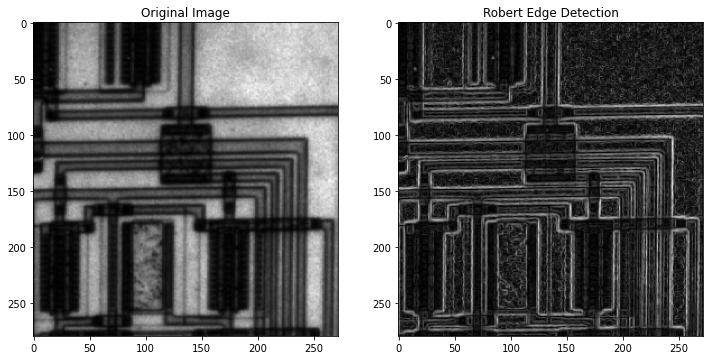

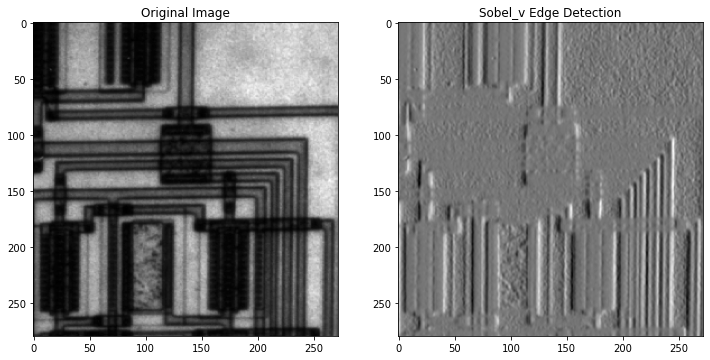

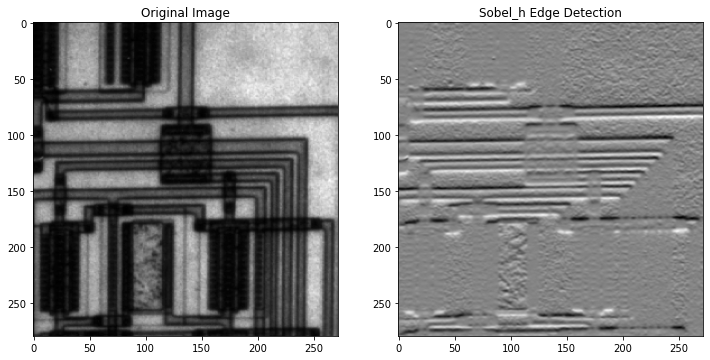

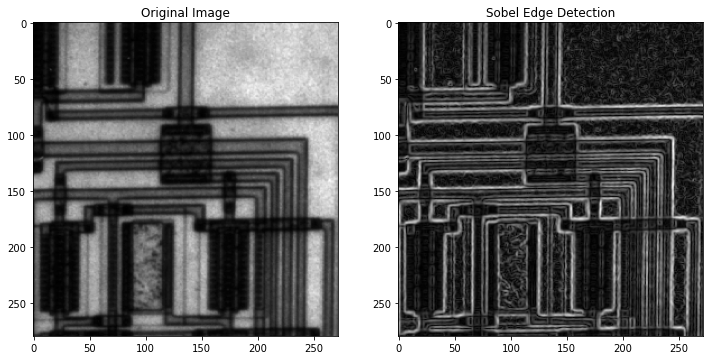

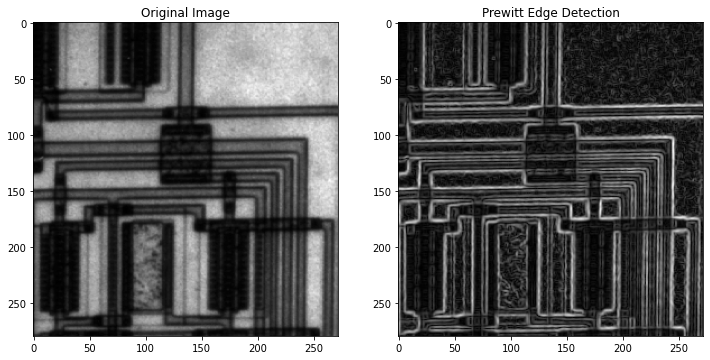

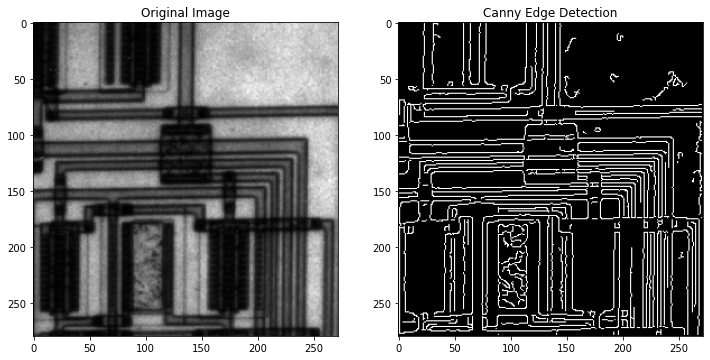

In [4]:
# 1. Built-in Sobel, Prewill, Roberts

img = rgb2gray(io.imread('circuit.tif'))
edge_roberts = filters.roberts(img)
edge_sobel = filters.sobel(img)
edge_sobel_h = filters.sobel_h(img)
edge_sobel_v = filters.sobel_v(img)
edge_prewitt = filters.prewitt(img)
edge_canny = feature.canny(img, sigma=1)

show_images([img, edge_roberts], ["Original Image", "Robert Edge Detection"])
show_images([img, edge_sobel_v], ["Original Image", "Sobel_v Edge Detection"])
show_images([img, edge_sobel_h], ["Original Image", "Sobel_h Edge Detection"])
show_images([img, edge_sobel], ["Original Image", "Sobel Edge Detection"])
show_images([img, edge_prewitt], ["Original Image", "Prewitt Edge Detection"])
show_images([img, edge_canny], ["Original Image", "Canny Edge Detection"])


C:\Users\Menna\AppData\Local\Temp/ipykernel_20108/4284617.py:59: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(io.imread('circuit.tif'))


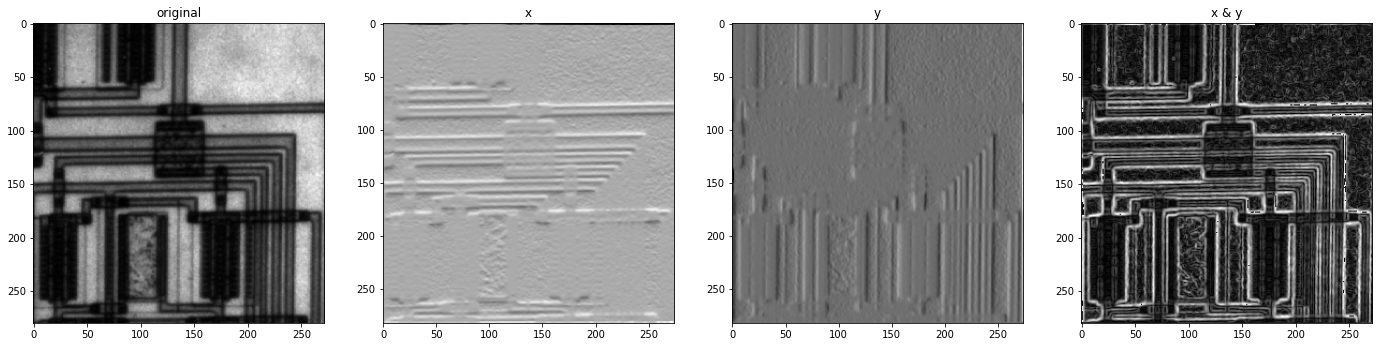

In [5]:
# 2. Custom Sobel (V-H-Both)

def custom_sobel(img,threshold):
    hx = np.array([
    [ -1,-2, -1],
    [0, 0,0],
    [ 1,2, 1]
    ])

    hy = np.array([
    [ -1,0, 1],
    [ -2,0,2],
    [ -1,0, 1]
    ])

    sobel_x = np.copy(img)
    sobel_y = np.copy(img)
    sobel_image = np.copy(img)

  
    img_h = img.shape[0]   # height 
    img_w = img.shape[1]   # width 

    ## Trivial solution ,, complexity !!
    # edgex = 1            #3//2
    # edgey = 1            #3//2
    # for x in range(edgey,img_h-1):
    #     for y in range (edgex,img_w-1):

    #         # x_value = img[x-1][y-1]*hx[0][0] + img[x-1][y]*hx[0][1]+img[x-1][y+1]*hx[0][2]
    #         # +img[x][y-1]*hx[1][0] + img[x][y]*hx[1][1] + img[x][y+1]*hx[1][2]
    #         # +img[x+1][y-1]*hx[2][0]+img[x+1][y]*hx[2][1] +img[x+1][y+1]*hx[2][2]

    #         # y_value = img[x-1][y-1]*hy[0][0] + img[x-1][y]*hy[0][1]+img[x-1][y+1]*hy[0][2]
    #         # +img[x][y-1]*hy[1][0] + img[x][y]*hy[1][1] + img[x][y+1]*hy[1][2]
    #         # +img[x+1][y-1]*hy[2][0]+img[x+1][y]*hy[2][1] +img[x+1][y+1]*hy[2][2]


    #         sobel_x [x][y] =  x_value 
    #         sobel_y [x][y] =  y_value 

    #         sobel_image [x][y] = 0 if np.sqrt(pow(x_value,2)+pow(y_value,2)) > threshold else 255 
            
    # show_images([img,sobel_x,sobel_y,sobel_image],["original","x","y","x & y"])
    
    sobel_x = convolve2d(img, hx)
    sobel_y = convolve2d(img, hy)
    
    
    for x in range(0,img_h-1):
        for y in range (0,img_w-1):
            sobel_image[x][y]= np.sqrt(sobel_y[x][y]** 2 + sobel_x[x][y] ** 2)

    np.where(sobel_image>threshold,255,0)

    show_images([img,sobel_x,sobel_y,sobel_image],["original","x","y","x & y"])
    return sobel_image

img = rgb2gray(io.imread('circuit.tif'))
sobel = custom_sobel(img,80)



C:\Users\Menna\AppData\Local\Temp/ipykernel_20108/3476262705.py:23: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(io.imread('circuit.tif'))


 ------------------ Threshold value =  20 ----------------------------


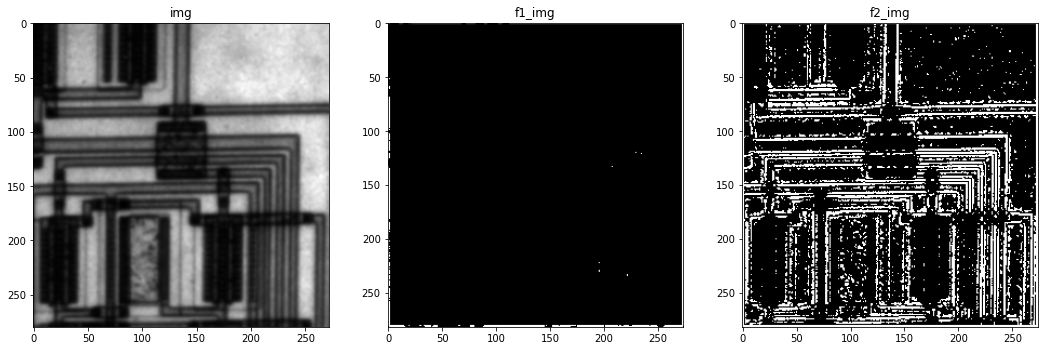

 ------------------ Threshold value =  17 ----------------------------


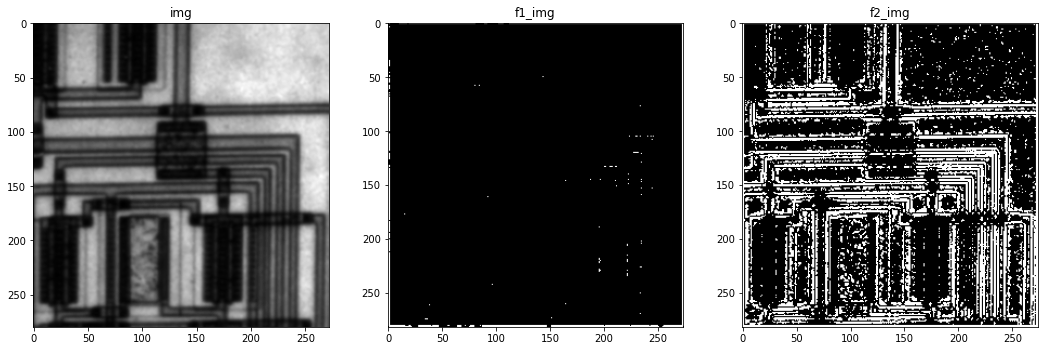

 ------------------ Threshold value =  12 ----------------------------


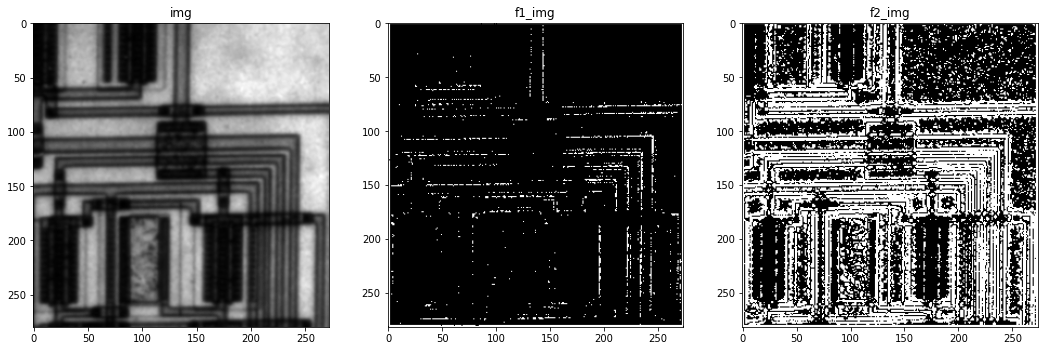

 ------------------ Threshold value =  9 ----------------------------


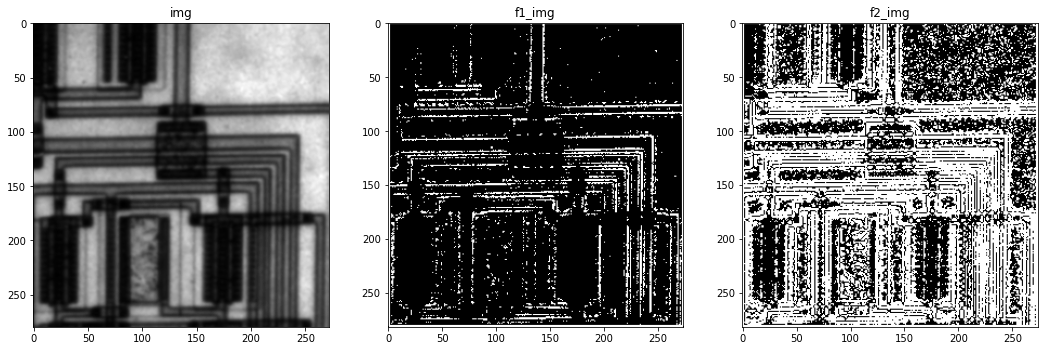

In [6]:
thres= 20
def custom_LOG(img,thres):

    f1=np.array([
    [ 0, 1, 0],
    [ 1,-4, 1],
    [ 0, 1, 0]
    ])
    f2=np.array([
    [-1,-1,-1],
    [-1, 8,-1],
    [-1,-1,-1]
    ])
    f1_img,f2_img = img.copy(),img.copy()
    f1_img=convolve2d(img,f1)
    f2_img=convolve2d(img,f2)
    
    f1_img=np.where(abs(f1_img)>thres,255,0)
    f2_img=np.where(abs(f2_img)>thres,255,0)
    print(" ------------------ Threshold value = ",thres,"----------------------------")
    show_images( [img, f1_img,f2_img],['img', 'f1_img','f2_img'])

img = rgb2gray(io.imread('circuit.tif'))

gaussian_img = filters.gaussian(image=img,sigma=1)
# after applying gaussisan filter -- (image intensity values scaled to be from 0 to 1 )
gaussian_img = gaussian_img=np.array(gaussian_img*255,dtype= np.uint8)
custom_LOG(gaussian_img,20)
custom_LOG(gaussian_img,17)
custom_LOG(gaussian_img,12)
custom_LOG(gaussian_img,9)

C:\Users\Menna\AppData\Local\Temp/ipykernel_20108/2135167539.py:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(io.imread('circuit.tif'))


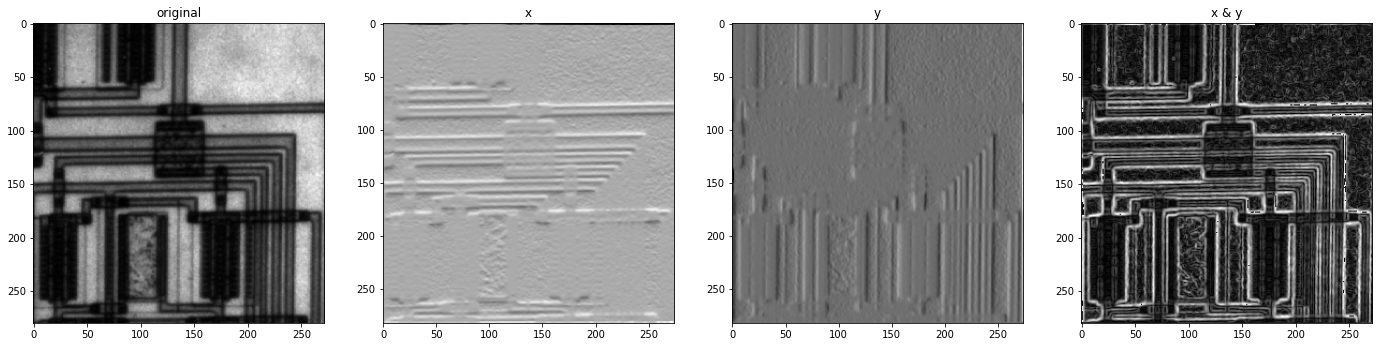

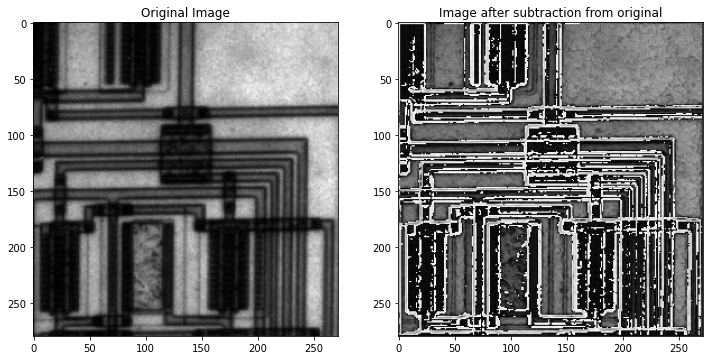

In [22]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''
img = rgb2gray(io.imread('circuit.tif'))
sobel_img = custom_sobel(img,80)

sobel_img = sobel_img/255
sobel_img = sobel_img*0.6
sobel_img =np.array(sobel_img*255,dtype= np.uint8)
sobel_img = img - sobel_img
show_images( [img, sobel_img],['Original Image', 'Image after subtraction from original'])




